In [22]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from PIL import Image
import numpy as np
import matplotlib.pyplot as plt
import os
import random

In [23]:
import os
import numpy as np
from PIL import Image, UnidentifiedImageError
from sklearn.model_selection import train_test_split

# Function to load images from a directory and label them
def load_images_from_folder(folder):
    images = []
    labels = []
    for label in ['0', '1']:  # 0 for cats, 1 for dogs
        class_folder = os.path.join(folder, label)
        for filename in os.listdir(class_folder):
            img_path = os.path.join(class_folder, filename)
            try:
                # Open the image file
                with Image.open(img_path) as img:
                    img = img.resize((100, 100))
                    img_array = np.array(img)
                    images.append(img_array)
                    labels.append(int(label))
            except (IOError, UnidentifiedImageError) as e:
                # Skip files that can't be identified as images
                print(f"Skipping file {img_path}: {e}")
    return np.array(images), np.array(labels)

# Load training and testing data
train_folder = 'dogvscat/train'
test_folder = 'dogvscat/test'

x_train, y_train = load_images_from_folder(train_folder)
x_test, y_test = load_images_from_folder(test_folder)

# Normalize the data
x_train = x_train / 255.0
x_test = x_test / 255.0

# Reshape labels to be compatible with models that require them in a specific shape
y_train = y_train.reshape(-1, 1)
y_test = y_test.reshape(-1, 1)

# Print the shapes of the datasets
print(f"x_train shape: {x_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"x_test shape: {x_test.shape}")
print(f"y_test shape: {y_test.shape}")


Skipping file dogvscat/train/0/.DS_Store: cannot identify image file '/Users/apple/Documents/programing /python/7.DeepLearning/dogvscat/train/0/.DS_Store'
Skipping file dogvscat/train/1/.DS_Store: cannot identify image file '/Users/apple/Documents/programing /python/7.DeepLearning/dogvscat/train/1/.DS_Store'
Skipping file dogvscat/test/0/.DS_Store: cannot identify image file '/Users/apple/Documents/programing /python/7.DeepLearning/dogvscat/test/0/.DS_Store'
x_train shape: (21500, 100, 100, 3)
y_train shape: (21500, 1)
x_test shape: (50, 100, 100, 3)
y_test shape: (50, 1)


In [24]:
model = Sequential([
    Conv2D(32, kernel_size=(3, 3), activation='relu', input_shape=(100, 100, 3)),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(64, kernel_size=(3, 3), activation='relu'),
    Dropout(0.2),
    MaxPooling2D(pool_size=(2, 2)),
    Conv2D(128, kernel_size=(3, 3), activation='relu'),
    MaxPooling2D(pool_size=(2, 2)),
    Flatten(),
    Dense(256, activation='relu'),
    Dropout(0.5),
    Dense(1, activation='sigmoid')
])

In [25]:
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [26]:
#model.summary()

In [27]:
early_stopping = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
lr_scheduler = ReduceLROnPlateau(monitor='val_loss', factor=0.5, patience=3, min_lr=1e-6)


In [28]:
model.fit(x_train, y_train, epochs=25, batch_size=32, validation_data=(x_test, y_test), callbacks=[early_stopping, lr_scheduler]) #

Epoch 1/25
672/672 ━━━━━━━━━━━━━━━━━━━━ 123s 180ms/step - accuracy: 0.5466 - loss: 0.6874 - val_accuracy: 0.5000 - val_loss: 0.7826 - learning_rate: 0.0010
Epoch 2/25
672/672 ━━━━━━━━━━━━━━━━━━━━ 128s 191ms/step - accuracy: 0.7186 - loss: 0.5527 - val_accuracy: 0.6200 - val_loss: 0.6678 - learning_rate: 0.0010
Epoch 3/25
672/672 ━━━━━━━━━━━━━━━━━━━━ 124s 185ms/step - accuracy: 0.7874 - loss: 0.4574 - val_accuracy: 0.6200 - val_loss: 0.6531 - learning_rate: 0.0010
Epoch 4/25
672/672 ━━━━━━━━━━━━━━━━━━━━ 132s 196ms/step - accuracy: 0.8255 - loss: 0.3870 - val_accuracy: 0.6000 - val_loss: 0.5544 - learning_rate: 0.0010
Epoch 5/25
672/672 ━━━━━━━━━━━━━━━━━━━━ 131s 195ms/step - accuracy: 0.8526 - loss: 0.3324 - val_accuracy: 0.7600 - val_loss: 0.5059 - learning_rate: 0.0010
Epoch 6/25
672/672 ━━━━━━━━━━━━━━━━━━━━ 125s 186ms/step - accuracy: 0.8762 - loss: 0.2839 - val_accuracy: 0.7600 - val_loss: 0.4803 - learning_rate: 0.0010
Epoch 7/25
672/672 ━━━━━━━━━━━━━━━━━━━━ 122s 181ms/step - accura

In [29]:
model.evaluate(x_test,y_test)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 37ms/step - accuracy: 0.7358 - loss: 0.5306


[0.47778069972991943, 0.7599999904632568]

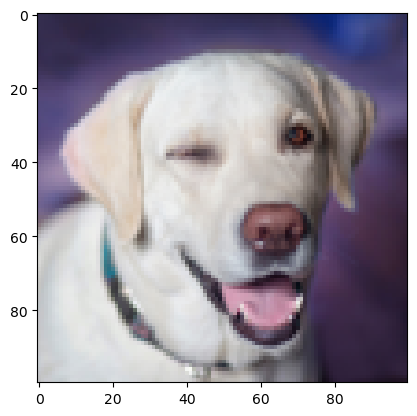

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step
Dog


In [39]:
idx2 = random. randint(0, len(x_test))
plt. imshow(x_test[idx2])
plt.show()
y_pred = model.predict(x_test[idx2,: ].reshape (1,100,100,3))
y_pred = y_pred > 0.5
if(y_pred == 0):
    print ("Cat")
else:
    print ("Dog")